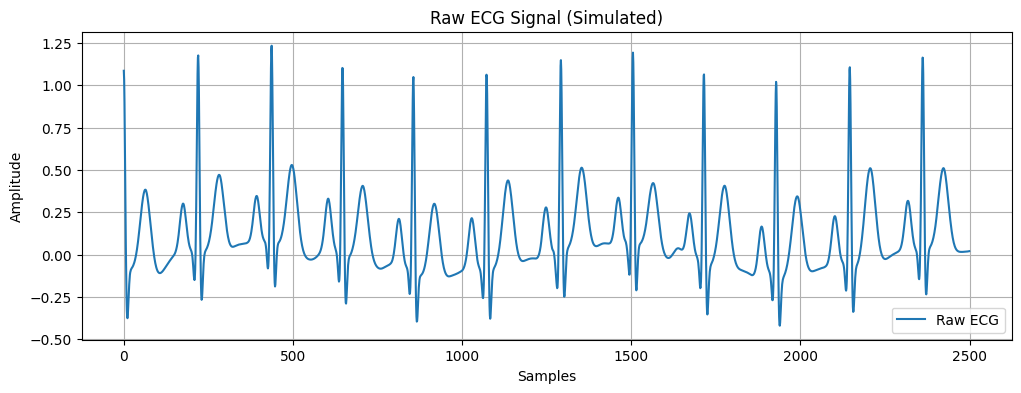

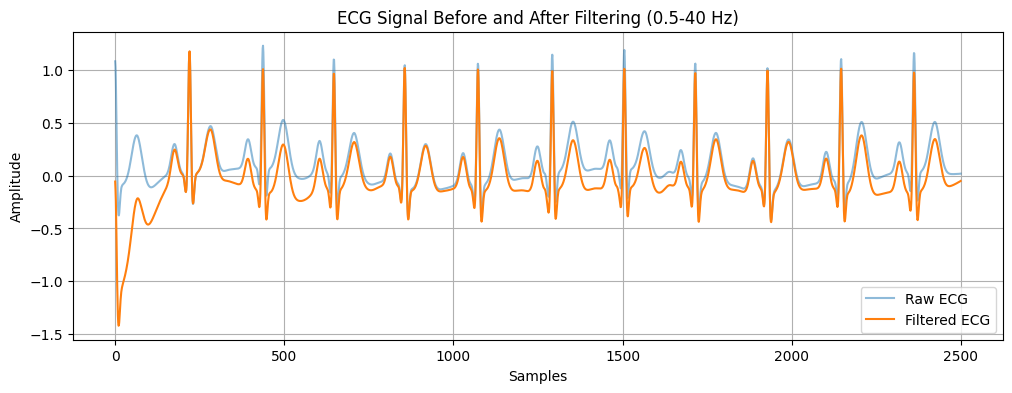

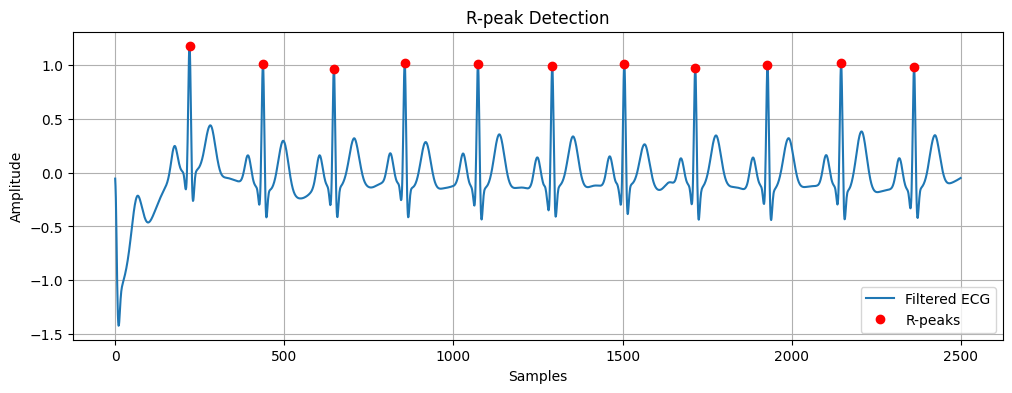

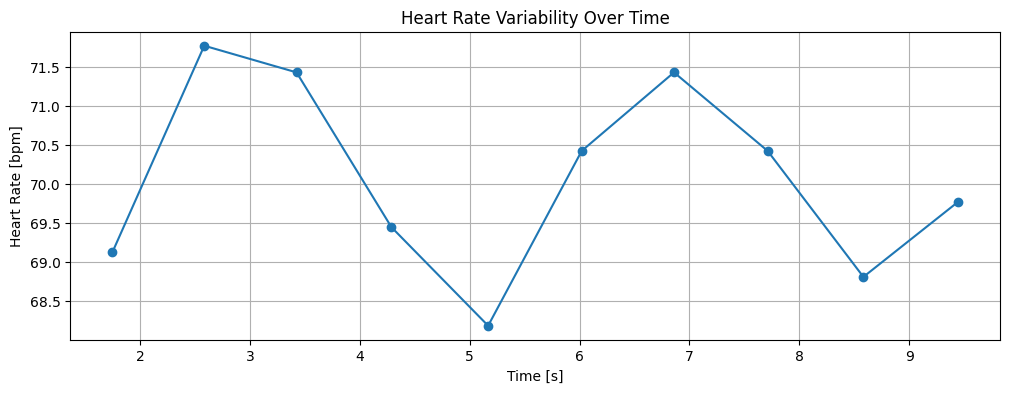

Number of detected R-peaks: 11
Average heart rate: 70.1 bpm
Heart rate standard deviation: 1.2 bpm

Commentary:
The bandpass filter (0.5-40 Hz) effectively removed:
- Baseline drift (low-frequency artifacts)
- High-frequency noise (e.g., muscle artifacts)
This makes R-peaks more clearly visible, improving detection accuracy.
The 0.5 Hz lower cutoff preserves slow-varying signal components,
while the 40 Hz upper cutoff reduces noise without losing important QRS complex information.


In [7]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt
import neurokit2 as nk
import pywt

# 1. ECG signal simulation
duration = 10  # duration in seconds
sampling_rate = 250  # sampling frequency in Hz
ecg = nk.ecg_simulate(duration=duration, sampling_rate=sampling_rate, heart_rate=70, noise=0.05)

# Visualization of raw ECG signal
plt.figure(figsize=(12, 4))
plt.plot(ecg, label='Raw ECG')
plt.title("Raw ECG Signal (Simulated)")
plt.xlabel("Samples")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)
plt.show()

# 2. Bandpass filter design and application
def bandpass_filter(signal, lowcut, highcut, fs, order=4):
    """
    Designs and applies Butterworth bandpass filter
    """
    nyq = 0.5 * fs  # Nyquist frequency
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return filtfilt(b, a, signal)

# Filter parameters
lowcut = 0.5  # lower cutoff frequency in Hz
highcut = 40  # upper cutoff frequency in Hz

# Signal filtering
filtered_ecg = bandpass_filter(ecg, lowcut, highcut, sampling_rate)

# Visualization of signal before and after filtering
plt.figure(figsize=(12, 4))
plt.plot(ecg, label='Raw ECG', alpha=0.5)
plt.plot(filtered_ecg, label='Filtered ECG')
plt.title("ECG Signal Before and After Filtering (0.5-40 Hz)")
plt.xlabel("Samples")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)
plt.show()

# 3. R-peak detection
signals, info = nk.ecg_process(filtered_ecg, sampling_rate=sampling_rate)
r_peaks = info["ECG_R_Peaks"]

# Visualization of detected R-peaks
plt.figure(figsize=(12, 4))
plt.plot(filtered_ecg, label="Filtered ECG")
plt.plot(r_peaks, filtered_ecg[r_peaks], "ro", label="R-peaks")
plt.title("R-peak Detection")
plt.xlabel("Samples")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)
plt.show()

# 4. Heart rate calculation and visualization
rr_intervals = np.diff(r_peaks) / sampling_rate  # RR intervals in seconds
heart_rate = 60 / rr_intervals  # heart rate in beats per minute (bpm)

# Heart rate visualization over time
r_peaks_time = r_peaks[1:] / sampling_rate  # R-peak times in seconds (excluding first peak)

plt.figure(figsize=(12, 4))
plt.plot(r_peaks_time, heart_rate, 'o-')
plt.title("Heart Rate Variability Over Time")
plt.xlabel("Time [s]")
plt.ylabel("Heart Rate [bpm]")
plt.grid(True)
plt.show()

# 5. Results interpretation
print(f"Number of detected R-peaks: {len(r_peaks)}")
print(f"Average heart rate: {np.mean(heart_rate):.1f} bpm")
print(f"Heart rate standard deviation: {np.std(heart_rate):.1f} bpm")

# Commentary on filtering impact on R-peak detection
print("\nCommentary:")
print("The bandpass filter (0.5-40 Hz) effectively removed:")
print("- Baseline drift (low-frequency artifacts)")
print("- High-frequency noise (e.g., muscle artifacts)")
print("This makes R-peaks more clearly visible, improving detection accuracy.")
print("The 0.5 Hz lower cutoff preserves slow-varying signal components,")
print("while the 40 Hz upper cutoff reduces noise without losing important QRS complex information.")